In [25]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [26]:
features_num = 2
num = 220

In [27]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)
X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0]

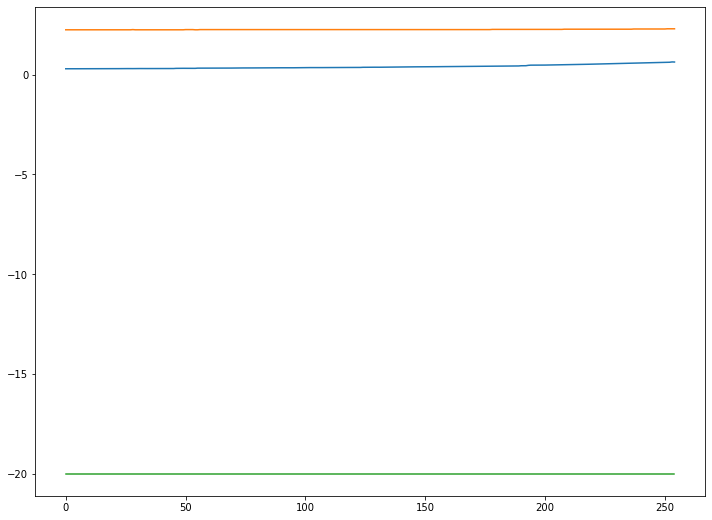

In [28]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [29]:
def make_dataset(data, label, window_size=50):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [30]:
train_feature, train_label = make_dataset(X_train, Y_train, 50)
train_feature.shape

(205, 50, 2)

In [31]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 50)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(208, 50, 2) (208,)


In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(164, 50, 2) (41, 50, 2)


In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Reshape([32,]))

In [34]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell7.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [35]:
history = model.fit(x_train, y_train,
                                    epochs=50,
                                    batch_size=5, steps_per_epoch=200,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[early_stop, checkpoint])

Epoch 1/50
200/200 [==============================] - 4s 13ms/step - loss: 0.0788 - mean_absolute_error: 0.2010 - val_loss: 0.0020 - val_mean_absolute_error: 0.0373

Epoch 00001: val_loss improved from inf to 0.00198, saving model to models\tmp_checkpointcell7.h5
Epoch 2/50
200/200 [==============================] - 2s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0310 - val_loss: 0.0013 - val_mean_absolute_error: 0.0297

Epoch 00002: val_loss improved from 0.00198 to 0.00130, saving model to models\tmp_checkpointcell7.h5
Epoch 3/50
200/200 [==============================] - 2s 11ms/step - loss: 8.6632e-04 - mean_absolute_error: 0.0230 - val_loss: 0.0022 - val_mean_absolute_error: 0.0429

Epoch 00003: val_loss did not improve from 0.00130
Epoch 4/50
200/200 [==============================] - 2s 10ms/step - loss: 8.3252e-04 - mean_absolute_error: 0.0229 - val_loss: 0.0019 - val_mean_absolute_error: 0.0368

Epoch 00004: val_loss did not improve from 0.00130
Epoch 5/50
200/200 [======

In [36]:
model.load_weights(filename)
pred = model.predict(test_feature)
print(pred)

[[0.34058738 0.32501355 0.32645407 ... 0.319743   0.34524697 0.330791  ]
 [0.34182996 0.32502428 0.32775325 ... 0.3201406  0.34508893 0.33067697]
 [0.34215754 0.32531562 0.32811424 ... 0.32032907 0.3453241  0.33098552]
 ...
 [0.35093963 0.33548772 0.3378775  ... 0.33027562 0.35404682 0.34056026]
 [0.35111767 0.3357029  0.33806184 ... 0.33046997 0.35423413 0.3408024 ]
 [0.35142964 0.33608124 0.33841822 ... 0.3308603  0.35450587 0.34111747]]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4480      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
reshape_4 (Reshape)          (None, 32)                0         
Total params: 5,536
Trainable params: 5,536
Non-trainable params: 0
_________________________________________________________________


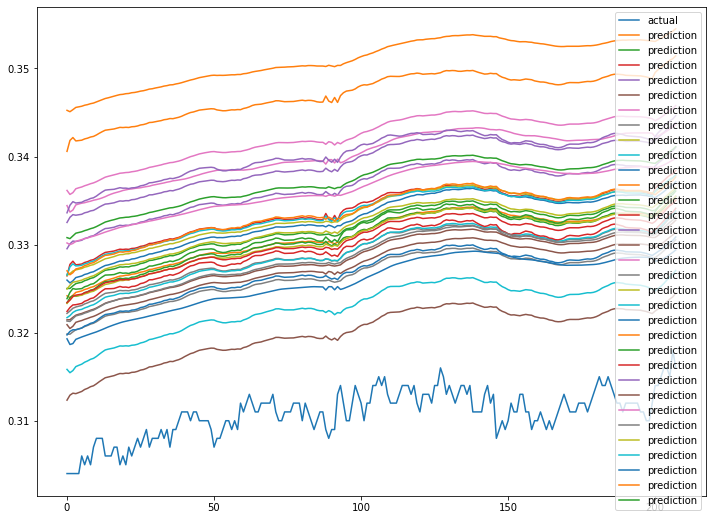

In [37]:
model.summary()

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [38]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)
x_test2 = test_ds2[:, 1:3]
y_test2 = test_ds2[:, 1]

In [39]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 50)

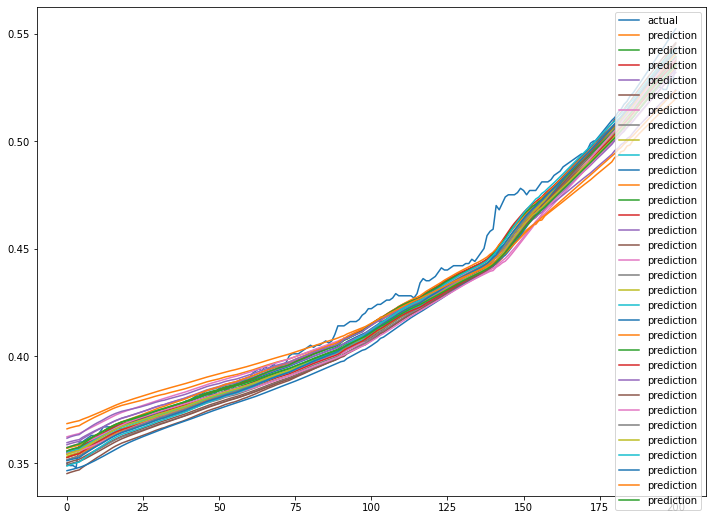

In [40]:
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2, label='actual')
plt.plot(pred2, label='prediction')
plt.legend()
plt.show()

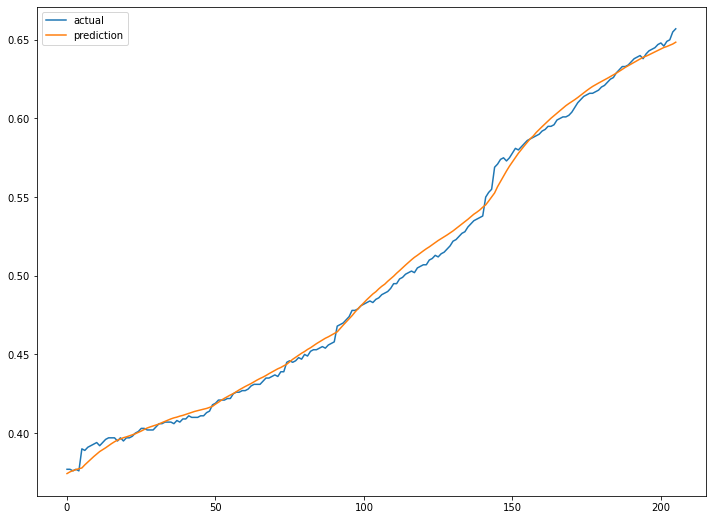

In [19]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)
x_test3 = test_ds3[:, 1:3]
y_test3 = test_ds3[:, 1]
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 50)

pred3 = model.predict(test_feature3)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3, label='prediction')
plt.legend()
plt.show()

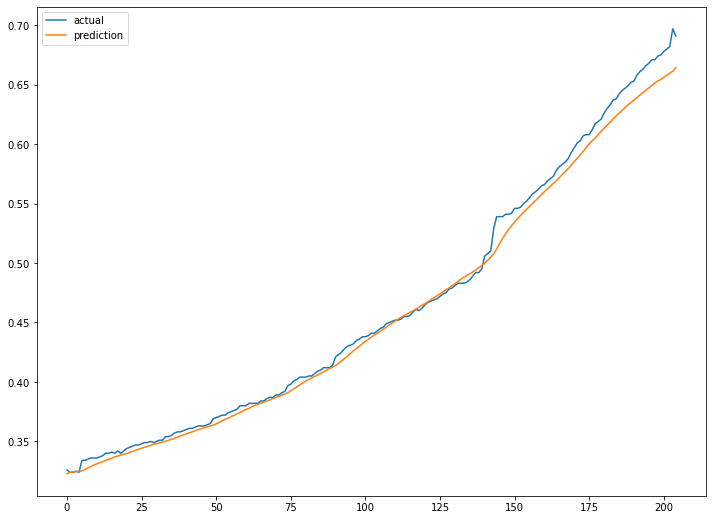

In [20]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
x_test4 = test_ds4[:, 1:3]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 50)

pred4 = model.predict(test_feature4)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.legend()
plt.show()

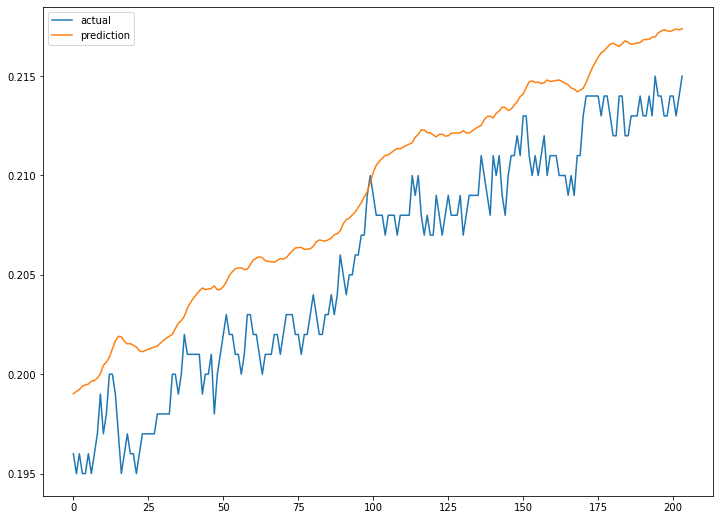

In [21]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
x_test5 = test_ds5[:, 1:3]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 50)

pred5 = model.predict(test_feature5)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.legend()
plt.show()

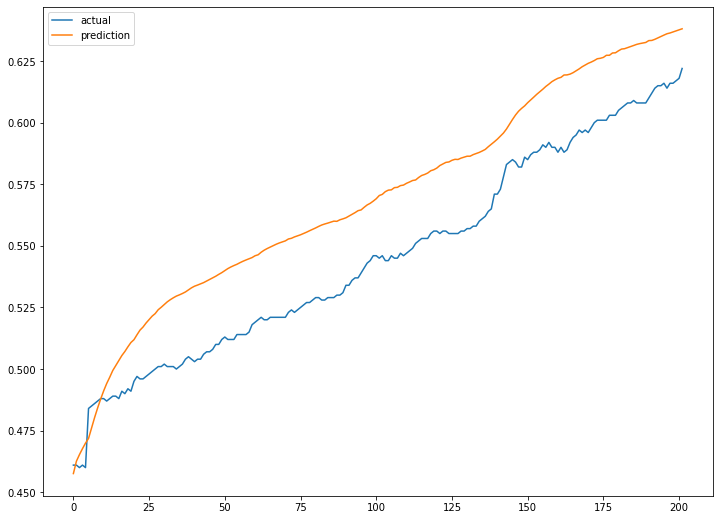

In [22]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
x_test6 = test_ds6[:, 1:3]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 50)

pred6 = model.predict(test_feature6)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.legend()
plt.show()

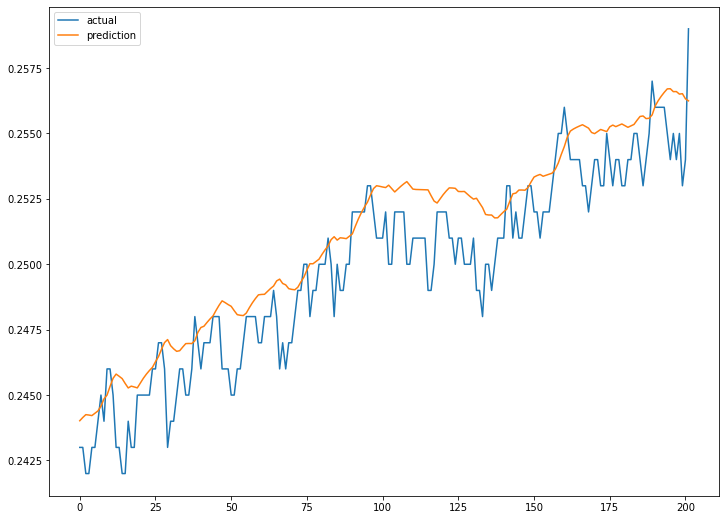

In [23]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
x_test7 = test_ds7[:, 1:3]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 50)

pred7 = model.predict(test_feature7)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.legend()
plt.show()

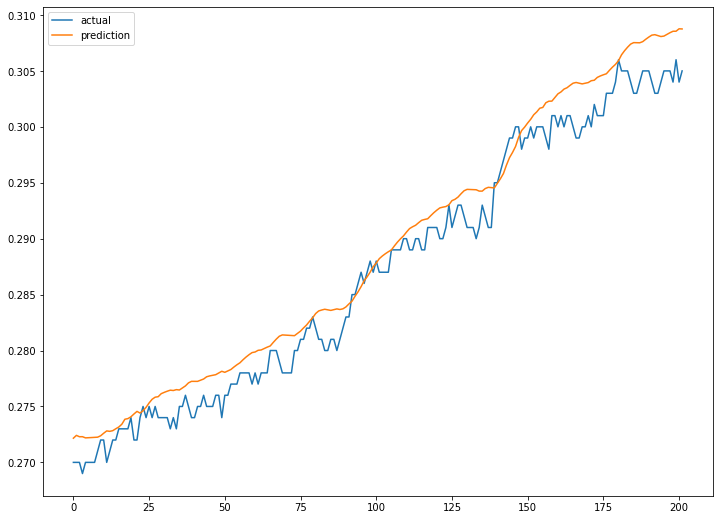

In [24]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
x_test7 = test_ds7[:, 1:3]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 50)

pred7 = model.predict(test_feature7)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.legend()
plt.show()

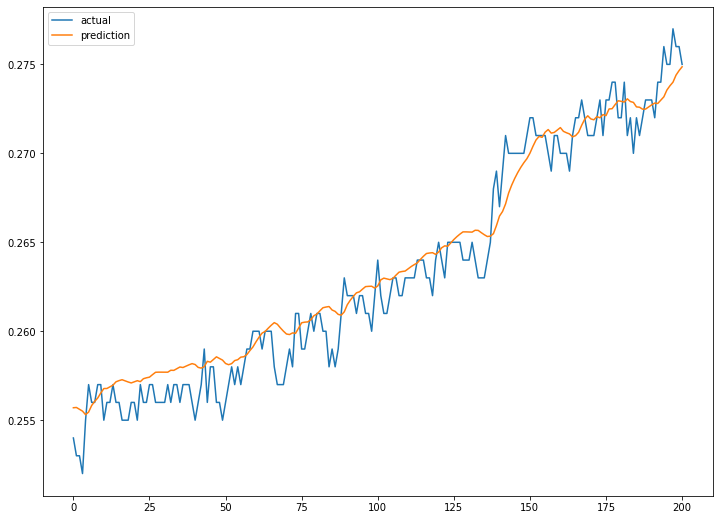

In [63]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
x_test8 = test_ds8[:, 1:3]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 50)

pred8 = model.predict(test_feature8)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.legend()
plt.show()

In [24]:
test8_len = len(y_test8)
test_label87 = y_test8[:int(test8_len*0.7)]
test_feature87 = x_test8[:int(test8_len*0.7),:]
print(test_feature87.shape)
test_feature87, test_label87 = make_dataset(test_feature87, test_label87, 50)

look_back = 40

x = test_feature87
a = x
a.shape

'''
for i in range(40):
    temp = model.predict(a)
    a = a[1:]
    a = np.append(a,temp)

'''

'''
xhat = test_feature87

for i in range(test8_len):
    prediction = model.predict(xhat)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
'''

print(test_label87.shape)
print(test8_len)
xhat = test_label87
print(xhat.shape)
predictions = np.zeros((test8_len, 3))
print(predictions.shape)
for i in range(test8_len):
    prediction = model.predict(xhat, batch_size=16)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
#pred8_test = model.predict(test_feature87)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(a, label='prediction')
plt.legend()
plt.show()

NameError: name 'y_test8' is not defined

In [26]:
print(pred8.shape)
print(test_feature8.shape)

(201, 1)
(201, 50, 2)


In [31]:
all_window = len(y_test8)

look_ahead = all_window
xhat = x_test8[:,0]
print(xhat.shape)
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=16)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
pred9 = predictions[:,2]
pred9 = pred9.reshape(-1,1)

plt.plot(y_test8)
plt.plot(pred9)
plt.legend()
plt.show()

(251,)


ValueError: in user code:

    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
